<a href="https://colab.research.google.com/github/anilbhatt1/EVA4P1_S15A_Depth_FG_Detection_DataPrep/blob/master/Visualization_FG_BG_Mask_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
! nvidia-smi

Fri May 15 05:29:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from zipfile import ZipFile
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import skimage
from skimage.transform import resize
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from datetime import datetime 
import gc
sns.set()
import os

## Visualizing BG Images

In [0]:
path_bg = '/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/BG_and_Its Flip Images/'

In [21]:
lst = []
for i in range(10): 
    x = np.random.randint(low=1, high=100, size=1)[0]
    lst.append(x)
lst    

[9, 44, 62, 58, 14, 93, 37, 77, 11, 54]

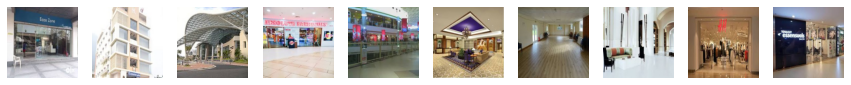

In [27]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    bg_img = 'Img' + str(lst[i-1]) + '.jpg'
    img = Image.open(f'{path_bg}{bg_img}')
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()    

## Visualizing BG_Flip Images

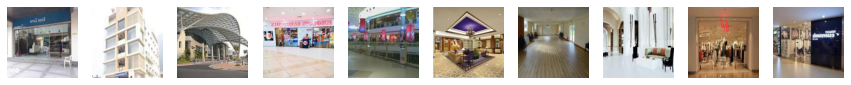

In [28]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    bg_img = 'Img' + str(lst[i-1]) + '_flip.jpg'
    img = Image.open(f'{path_bg}{bg_img}')
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

## Visualizing FG Images

In [0]:
path_fg = '/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_Images/'

In [41]:
lst = []
for i in range(10): 
    x = np.random.randint(low=1, high=100, size=1)[0]
    lst.append(x)
lst   

[67, 78, 89, 64, 31, 23, 51, 9, 34, 44]

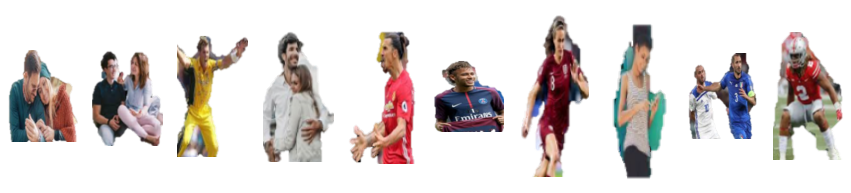

In [42]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    fg_img = 'Image' + str(lst[i-1]) + '.png'
    img = Image.open(f'{path_fg}{fg_img}')
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()  

## Visualizing FG_BG, FG_BG_Mask and FG_BG_Depth Images

In [0]:
FG_BG_zip        =  ZipFile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_400K.zip", 'r')
FG_BG_Mask_zip   =  ZipFile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_Mask_400K.zip", 'r')
FG_BG_Depth_zip  =  ZipFile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_Depth_400K.zip", 'r')

In [44]:
FG_BG_files          = [info.filename for info in FG_BG_zip.infolist() if not info.is_dir()]
FG_BG_Mask_files     = [info.filename for info in FG_BG_Mask_zip.infolist() if not info.is_dir()]
FG_BG_Depth_files    = [info.filename for info in FG_BG_Depth_zip.infolist() if not info.is_dir()]
print('FG_BG_Files      :',len(FG_BG_files),FG_BG_files[0])
print('FG_BG_Mask_Files :',len(FG_BG_Mask_files),FG_BG_Mask_files[0])
print('FG_BG_Depth_Files:',len(FG_BG_Depth_files),FG_BG_Depth_files[0])

FG_BG_Files      : 400000 FG_BG_400K/Img_fg_bg_182030.jpg
FG_BG_Mask_Files : 400000 FG_BG_Mask_400K/Img_fg_bg_mask389180.jpg
FG_BG_Depth_Files: 400000 FG_BG_Depth_0_400K/Img_fg_bg_214327_depth.jpg


In [45]:
lst = []
for i in range(10): 
    x = np.random.randint(low=1, high=400000, size=1)[0]
    lst.append(x)
lst   

[372186, 370215, 304853, 51868, 33568, 255059, 92954, 324019, 340116, 129212]

In [0]:
lst[-1] = 139212

## FG_BG Images

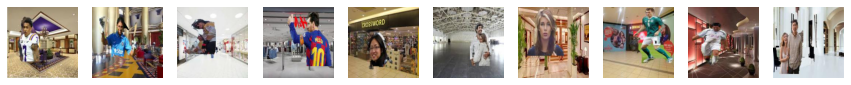

In [56]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    fg_bg_img = 'FG_BG_400K/Img_fg_bg_' + str(lst[i-1]) + '.jpg'
    imgdata = FG_BG_zip.read(fg_bg_img)
    img = Image.open(io.BytesIO(imgdata))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()  

## FG_BG_Mask Images

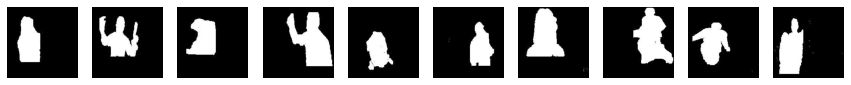

In [57]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    fg_bg_mask_img = 'FG_BG_Mask_400K/Img_fg_bg_mask' + str(lst[i-1]) + '.jpg'
    imgdata = FG_BG_Mask_zip.read(fg_bg_mask_img)
    img = Image.open(io.BytesIO(imgdata))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()  

## FG_BG Depth Images

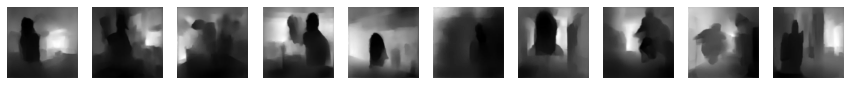

In [58]:
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    fg_bg_depth_img = 'FG_BG_Depth_0_400K/Img_fg_bg_' + str(lst[i-1]) + '_depth.jpg'
    imgdata = FG_BG_Depth_zip.read(fg_bg_depth_img)
    img = Image.open(io.BytesIO(imgdata))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()  